In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

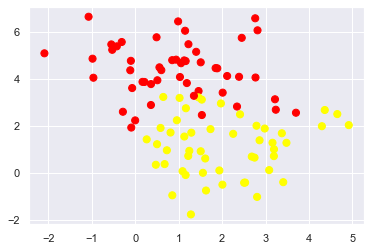

In [14]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1] , c=y,s=50, cmap='autumn');


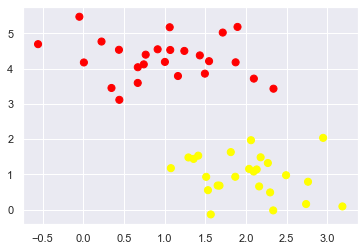

In [20]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, 
cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
  '''  Hyper plan H0 : w.xi+b =0 
       Hyper plan H1 : w.xi+b =>1 if yi = 1
       Hyper plan H2 : w.xi+b =<-1 if yi = -1  '''
    
    '''which we can combaine this eqaution to :
       yi(w.xi+b) >=1 fo i{1,...,n}            '''
    
    '''the distance between H1 and H2: 2/||w||'''
    
    '''The objective function is :
       L(w,b) = lam * 1/2 * ||w||**2 + c * 1/n * sum(max(0,1-yi(w.xi+b)))''

In [42]:
#convert to 1and -1
y = np.where(y <= 0,-1,1)
y

array([ 1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1])

In [43]:
enumerate(X)

In [44]:
#finding the optimal weight
#max(0, yi(wi.x+b))
#for maximize the distance: lambda * ||w||**2 + 1/n sum(max(0,1-yi(wi.x+b))) 

def SVM(X,y,lamb,lr,C,iterr):
    
    #getting number of feature and number of data
    n_saples,n_features = X.shape
    
    #initialising w and b with 0
    w = np.zeros(n_features)
    b = 0
    
    for i in range (iterr):
        for idx, x_i in enumerate(X):
            
            if (y[idx] * (np.dot(x_i,w) + b) >=1):
                w -=  lr * (lamb * w) 
                b = 0
            else:
                w -=  lr * (lamb * w - C *(np.dot(x_i,y[idx])))
                b -=  lr * (-C * y[idx])
        
    lin_out = np.dot(X,w)-b
    return np.sign(lin_out),w,b
    
  

In [45]:
s,w,b = SVM(X,y,0.001,0.001,50,1000)

In [46]:
s,w,b

(array([ 1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
         1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,
        -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.]),
 array([ 5.05360515, -3.73904246]),
 0)

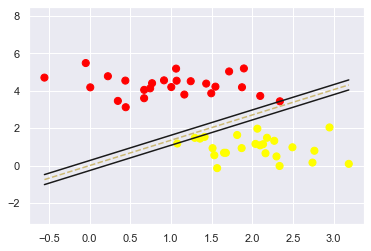

In [47]:
def visualize_svm():
    
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]
            
        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        
        plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, w, b, 0)
        x1_2 = get_hyperplane_value(x0_2, w, b, 0)

        x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
        x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

        x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
        x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

visualize_svm()